In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
plt.rc("text", usetex=True)
plt.rc("font", family="serif", size=18)

In [3]:
df = pd.read_pickle("../data/BCC_pickled.pkl")
df.head()

,Index,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0,1241035,7,8,3,7,4,5.0,7,8,2,1
1,1,1107684,6,10,5,5,4,10.0,6,10,1,1
2,2,691628,8,6,4,10,10,1.0,3,5,1,1
3,3,1226612,7,5,6,3,3,8.0,7,4,1,1
4,4,1142706,5,10,10,10,6,10.0,6,5,2,1


In [4]:
col_names = ['Clump Thickness', 'Uniformity of Cell Size', 
             'Uniformity of Cell Shape', 'Marginal Adhesion', 
             'Single Epithelial Cell Size', 
             'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']
X = df[col_names]
y = df.Class
X_train, X_test, y_train, y_test = skl.model_selection.train_test_split(
    X, y, test_size=0.33, random_state=42)

In [5]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [6]:
y_pred = clf.predict(X_test)
prob_y_pred = clf.predict_proba(X_test)

In [7]:
skl.metrics.confusion_matrix(y_test, y_pred)

array([[ 147,    5],
       [   2, 5001]])

In [8]:
print(f"Precision: {skl.metrics.precision_score(y_test, y_pred)*100:.5f}%")
print(f"Recall:    {skl.metrics.recall_score(y_test, y_pred)*100:.5f}%")

Precision: 99.90012%
Recall:    99.96002%


In [9]:
print(y_test.shape, prob_y_pred.shape)

(5155,) (5155, 2)


Text(0, 0.5, 'Precision')

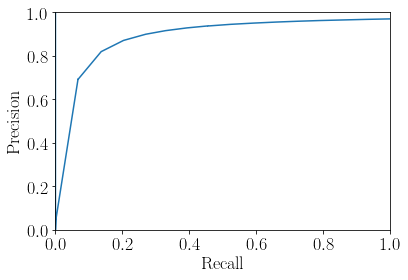

In [10]:
precision, recall, thresholds = skl.metrics.precision_recall_curve(y_test, prob_y_pred[:,0])
plt.plot(recall[1:], precision[1:])
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel(r"Recall")
plt.ylabel(r"Precision")
#plt.savefig("ROC.png", dpi=300, bbox_inches="tight")

In [11]:
import pickle
pickle.dump(clf, open('trained_logistic_regressor.pkl', 'wb'))